In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
raw_data = pd.read_csv(r'C:\Users\DELL\Desktop\Cyber security project\Datasets\PhiUSIIL_Phishing_URL_Dataset.csv')


In [4]:
raw_data.drop_duplicates(inplace=True)

In [5]:
raw_data.reset_index(drop=True,inplace=True)


In [10]:
raw_data.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [7]:
raw_data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [9]:
raw_data.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [10]:
null_cols = raw_data.columns[raw_data.isnull().any()]
raw_data[null_cols].isnull().sum()



Series([], dtype: float64)

In [13]:
count_ones = (raw_data['label'] == 1).sum()
print("Number of rows where target = 1:", count_ones)

count_zeros = (raw_data['label'] == 0).sum()
print("Number of rows where target = 0:", count_zeros)

Number of rows where target = 1: 134850
Number of rows where target = 0: 100945


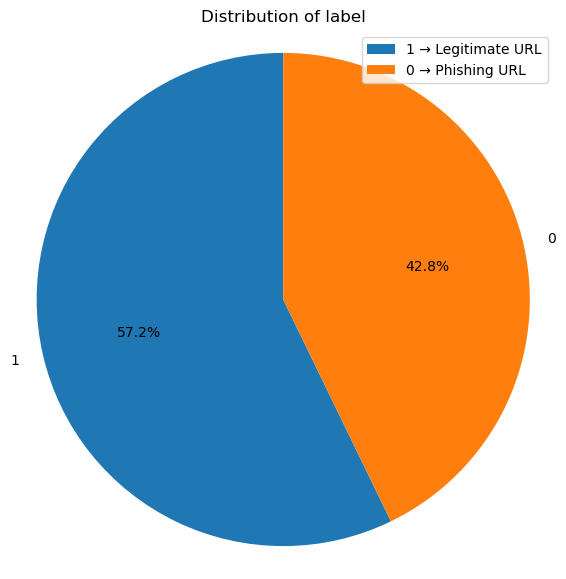

In [18]:
import matplotlib.pyplot as plt

target_col = 'label'   # change if needed

# Count values in target
value_counts = raw_data[target_col].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    value_counts,
    labels=[f"{int(i)}" for i in value_counts.index],  # show 0 and 1
    autopct='%1.1f%%',
    startangle=90
)
plt.title(f'Distribution of {target_col}')
plt.axis('equal')

# Legend
plt.legend(
    [
        "1 → Legitimate URL",
        "0 → Phishing URL"
    ],
    loc="upper right"
)

plt.show()


In [19]:
import pandas as pd

# Select only numerical columns (int + float)
num_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns

negative_counts = {}

for col in num_cols:
    neg_count = (raw_data[col] < 0).sum()
    negative_counts[col] = neg_count

# Display only columns that actually have negative values
negative_counts_filtered = {col: cnt for col, cnt in negative_counts.items() if cnt > 0}

negative_counts_filtered


{}

In [24]:
dtype_array = raw_data.dtypes
unique_dtypes = dtype_array.unique()
unique_dtypes


array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [27]:
def classify_features(df, target_col=None):
    # Remove target column from features
    if target_col is not None:
        df = df.drop(columns=[target_col])

    numerical_features = []
    binary_features = []
    categorical_features = []

    for col in df.columns:
        dtype = df[col].dtype

        # Categorical dtypes
        if dtype in ['object', 'string']:
            categorical_features.append(col)
        
        # Numeric columns
        elif dtype in ['int64', 'float64']:
            unique_vals = df[col].dropna().unique()
            
            # Binary (0/1)
            if set(unique_vals).issubset({0, 1}):
                binary_features.append(col)
            else:
                numerical_features.append(col)

        else:
            # fallback: treat unknown type as categorical
            categorical_features.append(col)

    return {
        "numerical": numerical_features,
        "binary": binary_features,
        "categorical": categorical_features
    }


In [29]:
feature_types = classify_features(raw_data, target_col='label')

print(len(feature_types['numerical']), "Numerical features:", feature_types["numerical"])
print(len(feature_types['binary']), "Binary features:", feature_types["binary"])
print(len(feature_types['categorical']), "Categorical features:", feature_types["categorical"])

31 Numerical features: ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
19 Binary features: ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo']
4 Categorical features: ['URL', 'Domain', 'TLD', 'Title']


In [30]:
raw_data.head(5)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


Training Random Forest Classifier...

=== Model Performance ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


=== Top 20 Most Important Features ===
                       feature  importance
3           URLSimilarityIndex    0.183878
49             NoOfExternalRef    0.162454
22                  LineOfCode    0.152791
47                 NoOfSelfRef    0.105723
44                   NoOfImage    0.089986
46                      NoOfJS    0.069587
36                HasSocialNet    0.032249
45                     NoOfCSS    0.029933
43            HasCopyrightInfo    0.025396
21                     IsHTTPS    0.022944
23           LargestLineLength    0.018639
32          

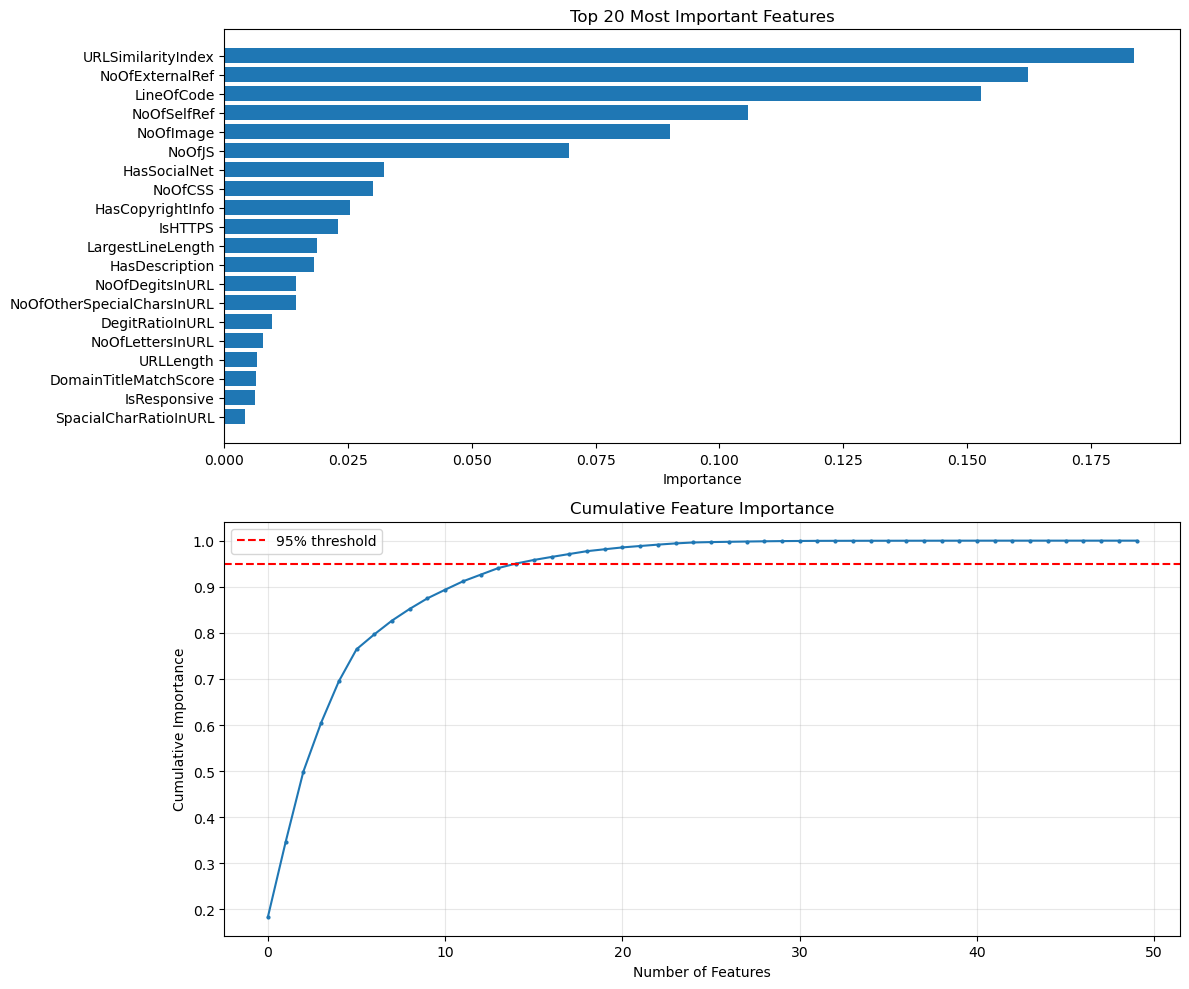


Number of features needed to capture 95% of importance: 15

Number of features with importance >= 0.01: 14

These features are:
['URLSimilarityIndex', 'NoOfExternalRef', 'LineOfCode', 'NoOfSelfRef', 'NoOfImage', 'NoOfJS', 'HasSocialNet', 'NoOfCSS', 'HasCopyrightInfo', 'IsHTTPS', 'LargestLineLength', 'HasDescription', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL']


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

target_col = 'label'

X = raw_data.drop(columns=[target_col] + feature_types['categorical'])
y = raw_data[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Model evaluation
print("\n=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 20 Most Important Features ===")
print(feature_importance.head(20))

# Save full feature importance to CSV
feature_importance.to_csv('feature_importance.csv', index=False)
print("\nFull feature importance saved to 'feature_importance.csv'")

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Top 20 features
top_n = 20
top_features = feature_importance.head(top_n)
axes[0].barh(range(top_n), top_features['importance'].values)
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(top_features['feature'].values)
axes[0].set_xlabel('Importance')
axes[0].set_title(f'Top {top_n} Most Important Features')
axes[0].invert_yaxis()

# Plot 2: Cumulative importance
cumulative_importance = feature_importance['importance'].cumsum()
axes[1].plot(range(len(cumulative_importance)), cumulative_importance, marker='o', markersize=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].set_title('Cumulative Feature Importance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance_plots.png', dpi=300, bbox_inches='tight')
print("\nPlots saved to 'feature_importance_plots.png'")
plt.show()

# Find number of features needed for 95% importance
n_features_95 = (cumulative_importance >= 0.95).argmax() + 1
print(f"\nNumber of features needed to capture 95% of importance: {n_features_95}")

# Get features above a threshold
threshold = 0.01  # Features contributing at least 1%
important_features = feature_importance[feature_importance['importance'] >= threshold]
print(f"\nNumber of features with importance >= {threshold}: {len(important_features)}")
print("\nThese features are:")
print(important_features['feature'].tolist())

In [65]:
# Keep only the top 46 most important features from raw_data
top_46_features = feature_importance.head(46)['feature'].tolist()

# Update raw_data to include only these features plus the target column
raw_data = raw_data[top_46_features + [target_col]]

print(f"Raw data shape after feature reduction: {raw_data.shape}")
print(f"Features kept: {len(top_46_features)}")
print(f"\nTop 46 features in raw_data:")
print(top_46_features)

Raw data shape after feature reduction: (87209, 47)
Features kept: 46

Top 46 features in raw_data:
['directory_length', 'qty_dollar_directory', 'qty_dot_file', 'qty_slash_directory', 'time_domain_activation', 'qty_slash_url', 'qty_underline_directory', 'qty_percent_directory', 'qty_at_file', 'qty_and_directory', 'qty_comma_directory', 'length_url', 'file_length', 'qty_questionmark_file', 'qty_plus_file', 'qty_space_file', 'qty_at_directory', 'qty_dot_directory', 'qty_comma_file', 'qty_exclamation_directory', 'qty_asterisk_file', 'qty_equal_directory', 'qty_tilde_directory', 'qty_dot_domain', 'qty_asterisk_directory', 'qty_slash_file', 'qty_tilde_file', 'time_domain_expiration', 'asn_ip', 'ttl_hostname', 'qty_hyphen_file', 'qty_percent_file', 'time_response', 'qty_exclamation_file', 'domain_length', 'qty_questionmark_directory', 'qty_underline_file', 'qty_space_directory', 'qty_plus_directory', 'qty_hashtag_file', 'qty_hashtag_directory', 'qty_equal_file', 'qty_and_file', 'qty_dot_url'

In [32]:
leaking_features = []

for col in X.columns:
    # only for numeric / binary columns
    if X[col].dtype in ['int64', 'float64']:
        same = (X[col] == y).all()
        inverse = (X[col] == 1 - y).all()
        if same or inverse:
            leaking_features.append((col, 'same' if same else 'inverse'))

leaking_features


[]

In [33]:
corr_with_label = raw_data.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(corr_with_label.head(20))
print("\nMost negative correlations:")
print(corr_with_label.tail(20))


label                    1.000000
URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
HasHiddenFields          0.507731
HasFavicon               0.493711
URLCharProb              0.469749
CharContinuationRate     0.467735
HasTitle                 0.459725
Robots                   0.392620
NoOfJS                   0.373500
Pay                      0.359747
NoOfSelfRef              0.316211
NoOfImage                0.274658
Name: label, dtype: float64

Most negative correlations:
NoOfSubDomain                -0.005955
NoOfObfuscatedChar           -0.015315
NoOfAmpersandInURL           -0.034622
LargestLineLength            -0.041111
ObfuscationRatio             -0.041915
NoOfURLRedirect              -0.046456
HasObfuscation               

In [34]:
from sklearn.utils import shuffle

# same X_train / X_test, but shuffled y
y_shuffled = shuffle(y, random_state=0)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X, y_shuffled, test_size=0.2, random_state=42, stratify=y_shuffled
)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_classifier.fit(X_train_s, y_train_s)
y_pred_s = rf_classifier.predict(X_test_s)

from sklearn.metrics import accuracy_score
print("Accuracy with shuffled labels:", accuracy_score(y_test_s, y_pred_s))


Accuracy with shuffled labels: 0.5718102589113425


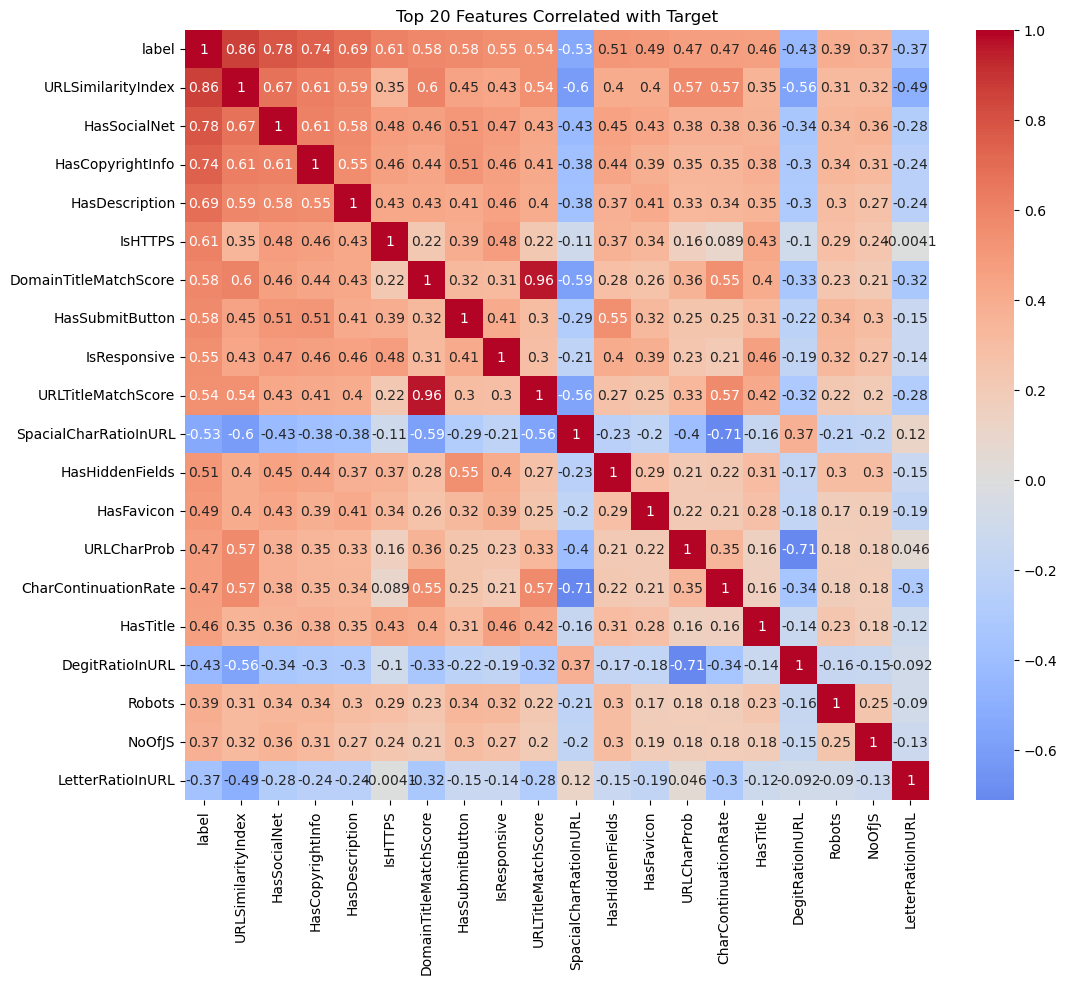

In [38]:
import numpy as np
# Compute correlation matrix
corr = raw_data.corr(numeric_only=True)
# Select top 20 features correlated with the target
target_col = 'label'
corr_target = corr[target_col].abs().sort_values(ascending=False)

top_features = corr_target.index[:20]
corr_subset = corr.loc[top_features, top_features]

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Top 20 Features Correlated with Target")
plt.show()


In [39]:
# 1) List of NON-deployable (HTML-based) features
non_deployable_candidates = [
    # From your heatmap
    'HasSocialNet',
    'HasCopyrightInfo',
    'HasDescription',
    'HasSubmitButton',
    'HasHiddenFields',
    'HasFavicon',
    'HasTitle',
    'IsResponsive',
    'DomainTitleMatchScore',
    'URLTitleMatchScore',
    'NoOfJS',
    'NoOfCSS',
    'NoOfImage',
    'Robots',
    # Extra HTML/DOM based features (also not deployable in practice)
    'LineOfCode',
    'NoOfSelfRef',
    'NoOfExternalRef',
    'NoOfURLRedirect',
    'NoOfSelfRedirect',
    'HasExternalFormSubmit',
    'HasPasswordField',
    'NoOfPopup',
    'NoOfiFrame',
    'NoOfEmptyRef'
]

# 2) Keep only those that actually exist in your dataframe
non_deployable_features = [
    col for col in non_deployable_candidates if col in raw_data.columns
]

print("Non-deployable features:")
print(non_deployable_features)




Non-deployable features:
['HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'HasSubmitButton', 'HasHiddenFields', 'HasFavicon', 'HasTitle', 'IsResponsive', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfJS', 'NoOfCSS', 'NoOfImage', 'Robots', 'LineOfCode', 'NoOfSelfRef', 'NoOfExternalRef', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasExternalFormSubmit', 'HasPasswordField', 'NoOfPopup', 'NoOfiFrame', 'NoOfEmptyRef']


In [41]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# -----------------------------
# 1) Define non-deployable features
# -----------------------------
non_deployable_candidates = [
    # HTML / DOM / content based → NOT deployable in real-time
    'HasSocialNet',
    'HasCopyrightInfo',
    'HasDescription',
    'HasSubmitButton',
    'HasHiddenFields',
    'HasFavicon',
    'HasTitle',
    'IsResponsive',
    'DomainTitleMatchScore',
    'URLTitleMatchScore',
    'NoOfJS',
    'NoOfCSS',
    'NoOfImage',
    'Robots',
    'LineOfCode',
    'NoOfSelfRef',
    'NoOfExternalRef',
    'NoOfURLRedirect',
    'NoOfSelfRedirect',
    'HasExternalFormSubmit',
    'HasPasswordField',
    'NoOfPopup',
    'NoOfiFrame',
    'NoOfEmptyRef'
]

# Keep only those that actually exist in the dataframe
non_deployable_features = [
    col for col in non_deployable_candidates if col in raw_data.columns
]

print("Non-deployable features found in dataset:")
print(non_deployable_features)

# -----------------------------
# 2) Build deployable feature matrix X (numeric only)
# -----------------------------
target_col = 'label'

# Only numeric columns (int/float)
numeric_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns

deployable_features = [
    col for col in numeric_cols
    if col not in non_deployable_features + [target_col]
]

print("\nNumber of deployable numeric features:", len(deployable_features))
print("Deployable numeric features:")
print(deployable_features)

X = raw_data[deployable_features]
y = raw_data[target_col]

# Optional: handle missing values
X = X.fillna(X.median(numeric_only=True))

# -----------------------------
# 3) Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True
)

# -----------------------------
# 4) Train Random Forest (deployable-only)
# -----------------------------
rf_deployable = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest on deployable features...")
rf_deployable.fit(X_train, y_train)

# -----------------------------
# 5) Evaluation
# -----------------------------
y_pred = rf_deployable.predict(X_test)

print("\n=== Model Performance (Deployable Features Only) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 6) Feature importance
# -----------------------------
feature_importance = pd.DataFrame({
    'feature': deployable_features,
    'importance': rf_deployable.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 20 Most Important Deployable Features ===")
print(feature_importance.head(20))



Non-deployable features found in dataset:
['HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'HasSubmitButton', 'HasHiddenFields', 'HasFavicon', 'HasTitle', 'IsResponsive', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfJS', 'NoOfCSS', 'NoOfImage', 'Robots', 'LineOfCode', 'NoOfSelfRef', 'NoOfExternalRef', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasExternalFormSubmit', 'HasPasswordField', 'NoOfPopup', 'NoOfiFrame', 'NoOfEmptyRef']

Number of deployable numeric features: 26
Deployable numeric features:
['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LargestLineLength', 'Bank', 'Pay', 'Crypto']

Training Random For

In [46]:
import pandas as pd

# Safety checks
cols_needed = ['URL', 'Bank', 'Pay', 'Crypto']
missing = [c for c in cols_needed if c not in raw_data.columns]
if missing:
    print("Missing columns in raw_data:", missing)
else:
    # 1) Define simple keyword-based detectors from URL text only
    def detect_bank_from_url(url: str) -> int:
        url = str(url).lower()
        keywords = ['bank', 'account', 'secure', 'ebanking', 'onlinebanking']
        return int(any(k in url for k in keywords))

    def detect_pay_from_url(url: str) -> int:
        url = str(url).lower()
        keywords = ['pay', 'paypal', 'payment', 'checkout']
        return int(any(k in url for k in keywords))

    def detect_crypto_from_url(url: str) -> int:
        url = str(url).lower()
        keywords = ['crypto', 'btc', 'bitcoin', 'eth', 'ethereum', 'wallet']
        return int(any(k in url for k in keywords))

    # 2) Recompute flags from URL only
    raw_data['Bank_from_url'] = raw_data['URL'].apply(detect_bank_from_url)
    raw_data['Pay_from_url'] = raw_data['URL'].apply(detect_pay_from_url)
    raw_data['Crypto_from_url'] = raw_data['URL'].apply(detect_crypto_from_url)

    # 3) Compare with existing dataset features
    for col in ['Bank', 'Pay', 'Crypto']:
        from_col = f"{col}_from_url"
        match_ratio = (raw_data[col] == raw_data[from_col]).mean()
        print(f"\n=== {col} consistency check ===")
        print(f"Match ratio between {col} and {from_col}: {match_ratio:.4f}")

        print("Crosstab (dataset vs from_url):")
        print(pd.crosstab(raw_data[col], raw_data[from_col], rownames=[f'{col} (dataset)'],
                          colnames=[f'{from_col} (recomputed)']))

    # 4) Optional: drop helper columns afterwards
    raw_data.drop(columns=['Bank_from_url', 'Pay_from_url', 'Crypto_from_url'], inplace=True)



=== Bank consistency check ===
Match ratio between Bank and Bank_from_url: 0.8714
Crosstab (dataset vs from_url):
Bank_from_url (recomputed)       0     1
Bank (dataset)                          
0                           204284  1544
1                            28779  1188

=== Pay consistency check ===
Match ratio between Pay and Pay_from_url: 0.7661
Crosstab (dataset vs from_url):
Pay_from_url (recomputed)       0    1
Pay (dataset)                         
0                          179900   10
1                           55139  746

=== Crypto consistency check ===
Match ratio between Crypto and Crypto_from_url: 0.9720
Crosstab (dataset vs from_url):
Crypto_from_url (recomputed)       0     1
Crypto (dataset)                          
0                             228930  1330
1                               5280   255


In [55]:
non_deployable_features.extend(['Bank', 'Pay', 'Crypto','LargestLineLength','URLSimilarityIndex','TLDLegitimateProb'])

# -----------------------------
# 2) Build deployable feature matrix X (numeric only)
# -----------------------------
target_col = 'label'

# Only numeric columns (int/float)
numeric_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns

deployable_features = [
    col for col in numeric_cols
    if col not in non_deployable_features + [target_col]
]

print("\nNumber of deployable numeric features:", len(deployable_features))
print("Deployable numeric features:")
print(deployable_features)

X = raw_data[deployable_features]
y = raw_data[target_col]

# Optional: handle missing values
X = X.fillna(X.median(numeric_only=True))

# -----------------------------
# 3) Train / Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True
)

# -----------------------------
# 4) Train Random Forest (deployable-only)
# -----------------------------
rf_deployable = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest on deployable features...")
rf_deployable.fit(X_train, y_train)

# -----------------------------
# 5) Evaluation
# -----------------------------
y_pred = rf_deployable.predict(X_test)

print("\n=== Model Performance (Deployable Features Only) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 6) Feature importance
# -----------------------------
feature_importance = pd.DataFrame({
    'feature': deployable_features,
    'importance': rf_deployable.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 20 Most Important Deployable Features ===")
print(feature_importance.head(20))




Number of deployable numeric features: 20
Deployable numeric features:
['URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS']

Training Random Forest on deployable features...

=== Model Performance (Deployable Features Only) ===
Accuracy: 0.9954

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20189
           1       0.99      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      0.99      1.00     47159
weighted avg       1.00      1.00      1.00     47159


=== Top 20 Most Important Deployable Features ===
                       featur

In [50]:
raw_data.drop(columns=non_deployable_features, inplace=True)

In [56]:
raw_data[deployable_features]

,URLLength,DomainLength,IsDomainIP,CharContinuationRate,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS
0,31,24,0,1.000000,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1
1,23,16,0,0.666667,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1
2,29,22,0,0.866667,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1
3,26,19,0,1.000000,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1
4,33,26,0,1.000000,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,1.000000,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1
235791,28,21,0,0.785714,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1
235792,30,23,0,1.000000,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1
235793,55,47,0,0.465116,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1


In [54]:
raw_data['TLD'].unique()

array(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es', 'jp',
       'guru', 'app', 'io', 'club', 'fr', 'au', 'today', 'cloud', 'br',
       'pt', 'co', 'lt', 'ca', 'xyz', 'sk', 'pl', 'dk', 'dev', 'ga',
       'edu', 'space', 'ws', '123', 'cf', 'rs', 'games', 'nl', 'me',
       'net', 'life', 'ua', 'id', 'mx', 'asia', 'store', 'nz', 'eus',
       'qa', 'fi', 'ch', 'site', 'shop', 'hr', 'cz', 'im', 'ee', 'sg',
       'travel', 'tz', 'top', 'info', 'tokyo', 'at', 'gr', 'cc', 'tv',
       'online', 'lk', 'review', 'us', 'bar', 'link', 'ng', 'cl', 'ar',
       'one', 'ph', 'tr', 'mil', 'se', '94', 'live', 'cn', 'ir', 'it',
       'gd', 'eu', 'win', 'no', 'su', 'gov', 'bg', 'ro', 'kr', 'eg',
       'biz', 'il', 'page', 'pm', 'sh', 'pk', 'my', 'quest', 'be', 'sa',
       'tk', 'vip', 'agency', 'cyou', 'kz', 'uy', 'network', '128', 'ml',
       'hk', 'media', 'az', 'aero', 'news', 'lu', 'is', 'coop', 'art',
       'download', 'si', 'fm', 'bt', 'am', 'finance', 'mn', 'kh', 'ug',
 

In [57]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


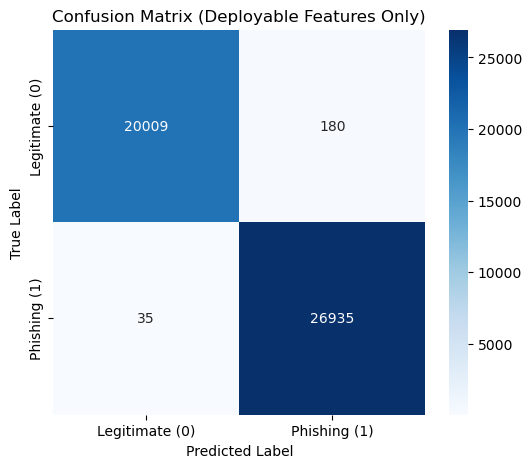

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Legitimate (0)', 'Phishing (1)'],
    yticklabels=['Legitimate (0)', 'Phishing (1)']
)
plt.title("Confusion Matrix (Deployable Features Only)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


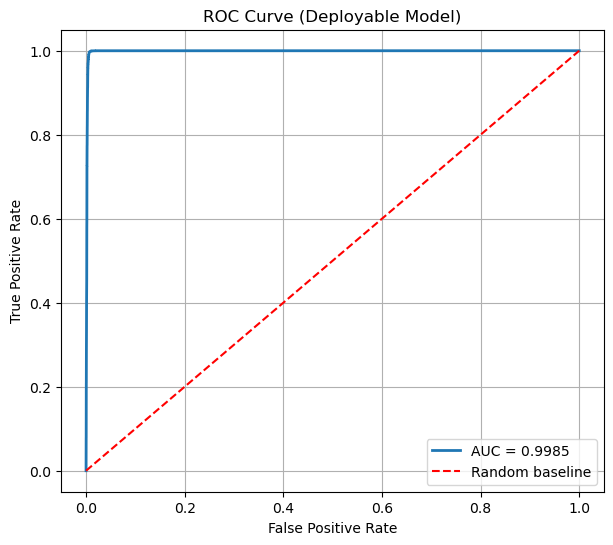

In [59]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_proba = rf_deployable.predict_proba(X_test)[:, 1]  # probability of phishing class

fpr, tpr, thresh = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'r--', label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Deployable Model)")
plt.legend()
plt.grid(True)
plt.show()
